<img src="financepng.png">

### Import the libraries

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data and set index

In [11]:
dataframe = pd.read_csv('/Users/nicolasdemuynck/BeCode/Github/data-visualization/stockmarket_closing_prices.csv'
                        , index_col = 'Date')
dataframe.head (5)

,Apple,AAG,Amazon,Facebook,Google,Intel,Microsoft,NDM
Date,,,,,,,,
2019-01-24,152.699997,65.779999,1654.930054,145.830002,1084.000000,49.759998,106.199997,0.71
2019-01-25,157.759995,63.480000,1670.569946,149.009995,1101.510010,47.040001,107.169998,0.71
2019-01-28,156.300003,64.529999,1637.890015,147.470001,1079.859985,46.709999,105.080002,0.75
2019-01-29,154.679993,64.559998,1593.880005,144.190002,1070.060059,46.540001,102.940002,0.75
2019-01-30,165.250000,64.660004,1670.430054,150.419998,1097.989990,47.540001,106.379997,0.77


In [36]:
dataframe.tail (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2020-03-26,258.440002,1955.489990,163.339996,1162.920044,55.540001,156.110001,264.943333,295.971269
2020-03-27,247.740005,1900.099976,156.789993,1110.260010,52.369999,149.699997,263.715715,295.301904
2020-03-30,254.809998,1963.949951,165.949997,1146.310059,55.490002,160.229996,262.832382,294.746507
2020-03-31,254.289993,1949.719971,166.800003,1161.949951,54.119999,157.710007,260.712382,294.155555
2020-04-01,240.910004,1907.699951,159.600006,1102.099976,51.880001,152.110001,258.407144,293.318412


In [12]:
dataframe.count ()

Apple        300
AAG          300
Amazon       300
Facebook     300
Google       300
Intel        300
Microsoft    300
NDM          300
dtype: int64

### Delete columns

In [13]:
del dataframe['AAG']
del dataframe['NDM']
dataframe.head (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft
Date,,,,,,
2019-01-24,152.699997,1654.930054,145.830002,1084.000000,49.759998,106.199997
2019-01-25,157.759995,1670.569946,149.009995,1101.510010,47.040001,107.169998
2019-01-28,156.300003,1637.890015,147.470001,1079.859985,46.709999,105.080002
2019-01-29,154.679993,1593.880005,144.190002,1070.060059,46.540001,102.940002
2019-01-30,165.250000,1670.430054,150.419998,1097.989990,47.540001,106.379997


### Add columns

In [19]:
dataframe['21_day_AAPL'] = dataframe.Apple.rolling(21).mean ()
dataframe['63_day_AAPL'] = dataframe.Apple.rolling (63).mean ()
dataframe.dropna (inplace = True)
dataframe.head (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2019-07-23,208.839996,1994.489990,202.360001,1148.050049,51.750000,139.289993,202.449525,196.019842
2019-07-24,208.669998,2000.810059,204.660004,1139.729980,52.919998,140.720001,202.930001,196.043810
2019-07-25,207.020004,1973.819946,200.710007,1135.939941,52.160000,140.190002,203.475239,196.071429
2019-07-26,207.740005,1943.050049,199.750000,1245.219971,51.590000,141.339996,203.853335,196.126032
2019-07-29,209.679993,1912.449951,195.940002,1241.839966,52.509998,141.029999,204.326667,196.206508


### Round the numbers to 2 decimal places

In [48]:
new_dataframe = dataframe.round (2)
new_dataframe.head (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2019-07-23,208.84,1994.49,202.36,1148.05,51.75,139.29,202.45,196.02
2019-07-24,208.67,2000.81,204.66,1139.73,52.92,140.72,202.93,196.04
2019-07-25,207.02,1973.82,200.71,1135.94,52.16,140.19,203.48,196.07
2019-07-26,207.74,1943.05,199.75,1245.22,51.59,141.34,203.85,196.13
2019-07-29,209.68,1912.45,195.94,1241.84,52.51,141.03,204.33,196.21


### Time serie

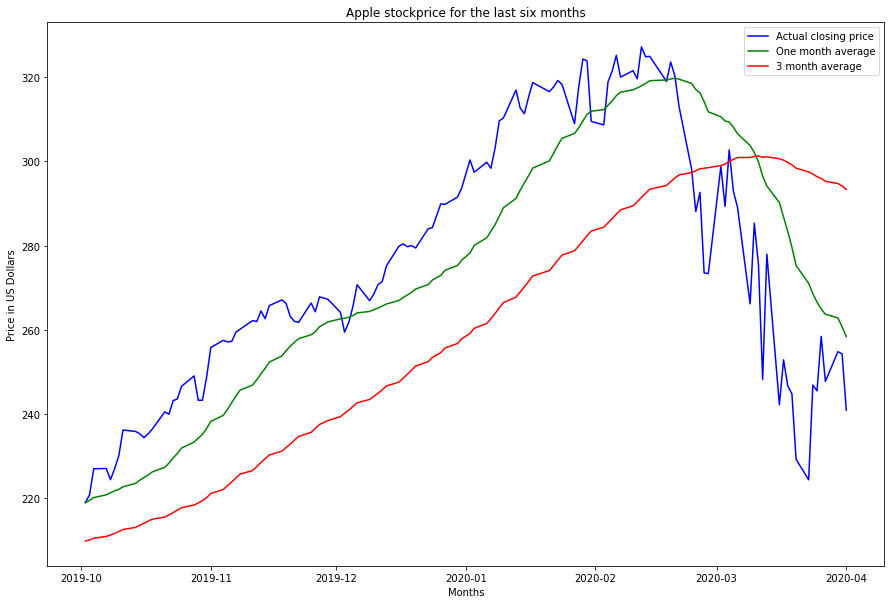

In [49]:
plt.figure(figsize = (15,10))

plt.plot (new_dataframe.Apple[-126:], label = 'Actual closing price', c= 'b')
plt.plot (new_dataframe['21_day_AAPL'][-126:], label = 'One month average', c = 'g') 
plt.plot (new_dataframe['63_day_AAPL'][-126:], label = '3 month average', c= 'r')

dataframe.index = pd.to_datetime(dataframe.index)

plt.xlabel ('Months')
plt.ylabel ('Price in US Dollars')
plt.title ('Apple stockprice for the last six months')

plt.legend ()

plt.show ()

### Transform the dataset

In [50]:
pct_change = np.log (new_dataframe).diff ()
pct_change.dropna (inplace = True)
pct_change.head (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2019-07-24,-0.000814,0.003164,0.011302,-0.007273,0.022357,0.010214,0.002368,0.000102
2019-07-25,-0.007939,-0.013581,-0.019489,-0.003331,-0.014465,-0.003773,0.002707,0.000153
2019-07-26,0.003472,-0.015712,-0.004794,0.091852,-0.010988,0.008170,0.001817,0.000306
2019-07-29,0.009295,-0.015874,-0.019258,-0.002718,0.017676,-0.002196,0.002352,0.000408
2019-07-30,-0.004301,-0.007305,0.005598,-0.011207,-0.015546,-0.004833,0.002493,0.000662


### Descriptive statistics

In [53]:
new_dataframe.describe ()

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,257.277500,1842.313636,192.401648,1286.862670,55.186136,150.520909,254.657841,242.633068
std,39.173373,105.662131,16.592467,112.774952,6.008011,14.286038,39.725405,37.739440
min,193.340000,1676.610000,146.010000,1054.130000,44.610000,132.210000,202.450000,195.850000
25%,220.790000,1768.735000,183.662500,1205.592500,50.915000,138.425000,214.590000,207.812500
50%,257.370000,1807.710000,191.225000,1268.275000,55.900000,147.190000,258.150000,235.155000
75%,289.440000,1888.420000,202.395000,1354.702500,58.932500,158.977500,289.315000,281.427500
max,327.200000,2170.220000,223.230000,1524.870000,68.470000,188.700000,319.760000,301.310000


In [54]:
pct_change.describe ()

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.000816,-0.000254,-0.001356,-0.000233,0.000014,0.000503,0.001395,0.002303
std,0.027908,0.019589,0.025894,0.023926,0.034013,0.027863,0.004677,0.001856
min,-0.137708,-0.082535,-0.153769,-0.123685,-0.198957,-0.159453,-0.015644,-0.002954
25%,-0.007419,-0.009621,-0.012793,-0.007008,-0.010110,-0.008634,0.000122,0.001539
50%,0.001644,-0.001005,0.001334,0.000467,-0.000892,0.001027,0.002620,0.002371
75%,0.013366,0.008399,0.011265,0.009840,0.012639,0.011668,0.004316,0.003796
max,0.113157,0.071196,0.097444,0.091852,0.178324,0.132929,0.007583,0.004990


### Histogram

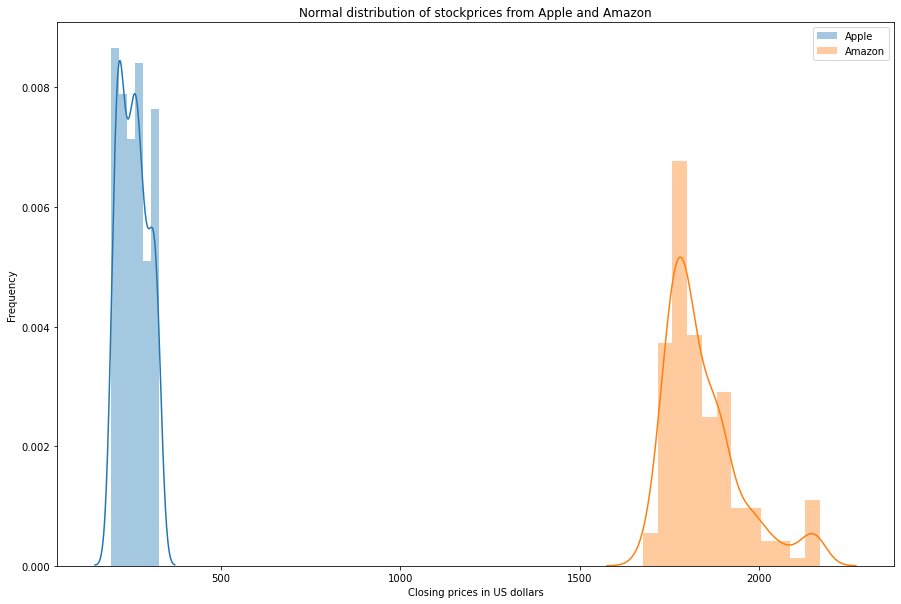

In [45]:
plt.figure(figsize = (15,10))

sns.distplot (dataframe.Apple, label = 'Apple')
sns.distplot (dataframe.Amazon, label = 'Amazon')

plt.title('Normal distribution of stockprices from Apple and Amazon')
plt.xlabel ('Closing prices in US dollars')
plt.ylabel ('Frequency')

plt.legend ()

plt.show ()

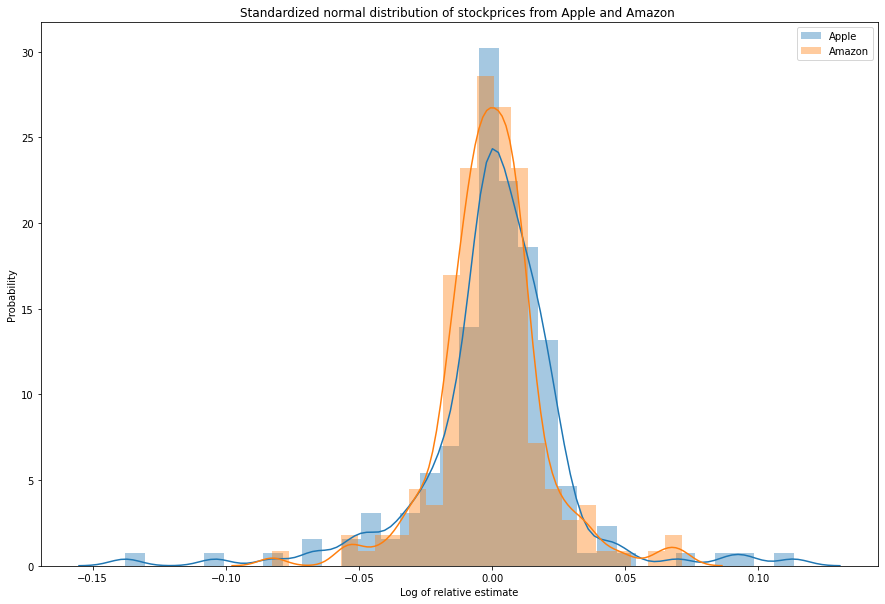

In [33]:
plt.figure(figsize = (15,10))

sns.distplot (pct_change.Apple, label = 'Apple')
sns.distplot (pct_change.Amazon, label = 'Amazon')

plt.title('Standardized normal distribution of stockprices from Apple and Amazon ')
plt.xlabel ('Log of relative estimate')
plt.ylabel ('Probability')

plt.legend ()

plt.show ()